In [1]:

# Google Drive bağlantısı
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# İngilizce: Importing necessary libraries for data analysis and visualization
# Türkçe: Veri analizi ve görselleştirme için gerekli kütüphanelerin yüklenmesi

import pandas as pd  # İngilizce: Data manipulation and analysis
                     # Türkçe: Veri manipülasyonu ve analizi

import numpy as np   # İngilizce: Numerical operations
                     # Türkçe: Sayısal işlemler

import matplotlib.pyplot as plt  # İngilizce: Plotting graphs
                                 # Türkçe: Grafik çizimi

import seaborn as sns  # İngilizce: Statistical data visualization
                       # Türkçe: İstatistiksel veri görselleştirme

import plotly.express as px  # İngilizce: Interactive plots
                             # Türkçe: Etkileşimli grafikler

import geopandas as gpd  # İngilizce: Geospatial data analysis
                         # Türkçe: Coğrafi veri analizi


In [23]:
# İngilizce: Loading the dataset
# Türkçe: Veri setinin yüklenmesi

file_path = '/content/drive/MyDrive/Salih/dataset/US_Accidents_March23.csv'  # İngilizce: Replace with your dataset's path
                                        # Türkçe: Veri setinizin yoluyla değiştirin



try:
    df = pd.read_csv(file_path)  # İngilizce: Reading the CSV file into a DataFrame
                             # Türkçe: CSV dosyasını DataFrame'e okuma
    print("Dataset successfully loaded.")
except FileNotFoundError:
    print("Dataset not found. Please check the file path.")

Dataset successfully loaded.


# ===========================================
# Data Preprocessing - Veri Ön İşleme
# ===========================================

In [24]:
# English: Displaying the shape of the dataset
# Türkçe: Veri çerçevesinin boyutlarını görüntüleme
print("The shape of the dataset is:", df.shape)

# English: Displaying the first 5 rows of the dataset
# Türkçe: Veri çerçevesinin ilk 5 satırını görüntüleme
print("\nFirst 5 rows of the dataset:\n")  # İngilizce: Veri setinin ilk 5 satırını yazdır
print(df.head())

The shape of the dataset is: (7728394, 46)

First 5 rows of the dataset:

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal 

In [25]:
df.shape
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [26]:
# English: Displaying unique values in the 'Source' column
# Türkçe: 'Source' sütunundaki benzersiz değerleri görüntüleme
unique_sources = df['Source'].unique()
print("Unique Sources:", unique_sources)

# English: Displaying unique states in the 'State' column
# Türkçe: 'State' sütunundaki benzersiz eyaletleri görüntüleme
unique_states = df['State'].unique()
print("\nUnique States:", unique_states)

Unique Sources: ['Source2' 'Source3' 'Source1']

Unique States: ['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'NC' 'AZ' 'TN' 'LA' 'MN' 'CO' 'OK' 'NV' 'UT' 'KS' 'NM' 'AR' 'MS'
 'ME' 'VT' 'WY' 'ID' 'ND' 'MT' 'SD']


In [27]:
# Display basic information about the dataset
# Veri seti hakkında temel bilgileri görüntüleyin
print("Dataset Information / Veri Seti Bilgileri")
print(df.info())

Dataset Information / Veri Seti Bilgileri
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F

In [28]:
# Display basic statistics of the dataset
# Veri setinin temel istatistiklerini görüntüleyin
print("\nBasic Statistics / Temel İstatistikler:")
print(df.describe())


Basic Statistics / Temel İstatistikler:
           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238

In [29]:
# English: Get the data types of each column in the DataFrame
# Türkçe: Veri çerçevesindeki her sütunun veri türlerini elde etme
dtype_df = df.dtypes.reset_index()

# English: Rename columns for better understanding
# Türkçe: Daha iyi anlaşılması için sütunları yeniden adlandırma
dtype_df.columns = ["Column Name", "Column Type"]

# English: Display the DataFrame with data types
# Türkçe: Veri türlerini içeren çerçeveyi görüntüleme
print(dtype_df)

              Column Name Column Type
0                      ID      object
1                  Source      object
2                Severity       int64
3              Start_Time      object
4                End_Time      object
5               Start_Lat     float64
6               Start_Lng     float64
7                 End_Lat     float64
8                 End_Lng     float64
9            Distance(mi)     float64
10            Description      object
11                 Street      object
12                   City      object
13                 County      object
14                  State      object
15                Zipcode      object
16                Country      object
17               Timezone      object
18           Airport_Code      object
19      Weather_Timestamp      object
20         Temperature(F)     float64
21          Wind_Chill(F)     float64
22            Humidity(%)     float64
23           Pressure(in)     float64
24         Visibility(mi)     float64
25         W

In [30]:
# English: Count occurrences of each data type
# Türkçe: Her veri türünün kaç kez geçtiğini sayma
dtype_summary = dtype_df['Column Type'].value_counts()
print(dtype_summary)

Column Type
object     20
bool       13
float64    12
int64       1
Name: count, dtype: int64


In [31]:
# English: Group by data type and count the number of columns for each type
# Türkçe: Veri türüne göre gruplandır ve her tür için sütun sayısını hesapla
dtype_summary = dtype_df.groupby("Column Type").aggregate('count').reset_index()

# English: Rename the columns for clarity
# Türkçe: Sütunları daha açıklayıcı hale getirme
dtype_summary.columns = ["Column Type", "Count of Columns"]

# English: Display the summary of column types
# Türkçe: Veri türü özetini görüntüleme
print(dtype_summary)


  Column Type  Count of Columns
0        bool                13
1       int64                 1
2     float64                12
3      object                20


In [32]:
dtype_summary["Percentage"] = (dtype_summary["Count of Columns"] / dtype_df.shape[0]) * 100
print(dtype_summary)


  Column Type  Count of Columns  Percentage
0        bool                13   28.260870
1       int64                 1    2.173913
2     float64                12   26.086957
3      object                20   43.478261


In [33]:
# Step 4: Analyze missing values
# Eksik veri analizi
# Missing data analysis
print("\nMissing Values Analysis / Eksik Veri Analizi:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values Analysis / Eksik Veri Analizi:
End_Lat                  3402762
End_Lng                  3402762
Description                    5
Street                     10869
City                         253
Zipcode                     1915
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
dtype: int64


In [34]:
# Calculate missing value ratios
# Eksik veri oranlarını hesaplama
missing_ratios = (missing_values / len(df)) * 100
print("\nMissing Values Ratios / Eksik Veri Oranları (%):")
print(missing_ratios[missing_ratios > 0])


Missing Values Ratios / Eksik Veri Oranları (%):
End_Lat                  44.029355
End_Lng                  44.029355
Description               0.000065
Street                    0.140637
City                      0.003274
Zipcode                   0.024779
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition         2.244438
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Nautical_Twilight         0.300787
Astronomical_Twilight     0.300787
dtype: float64


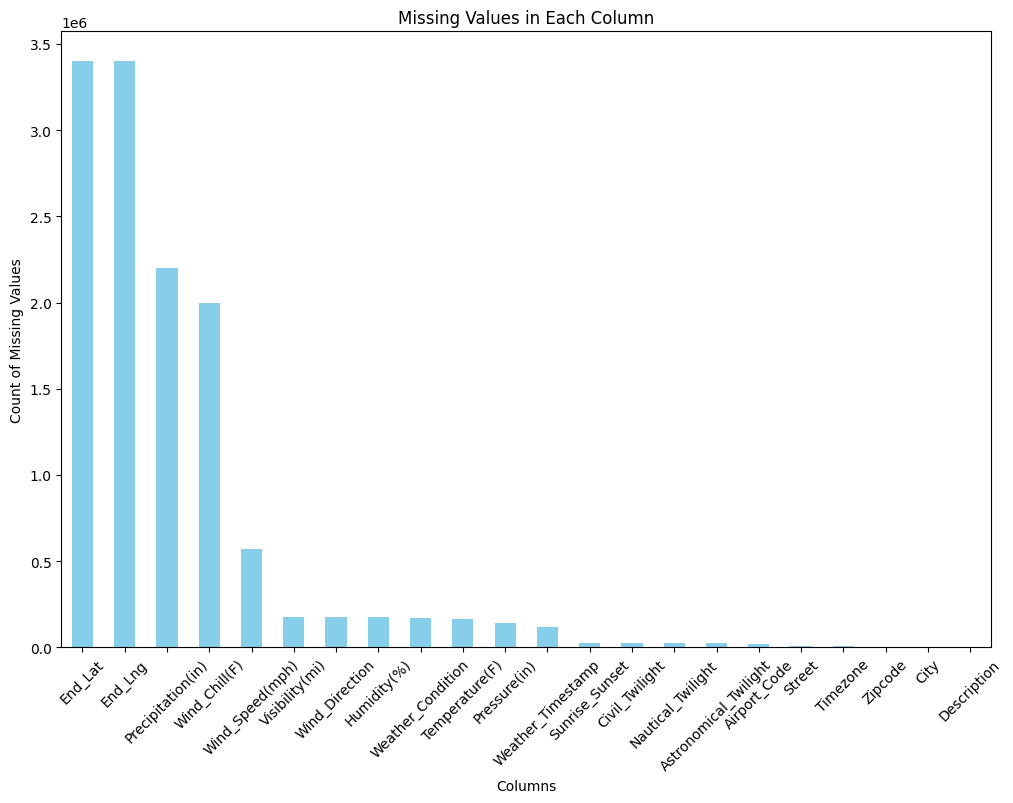

In [35]:
# Visualize missing values
# Eksik verileri görselleştirme
plt.figure(figsize=(12, 8))
missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

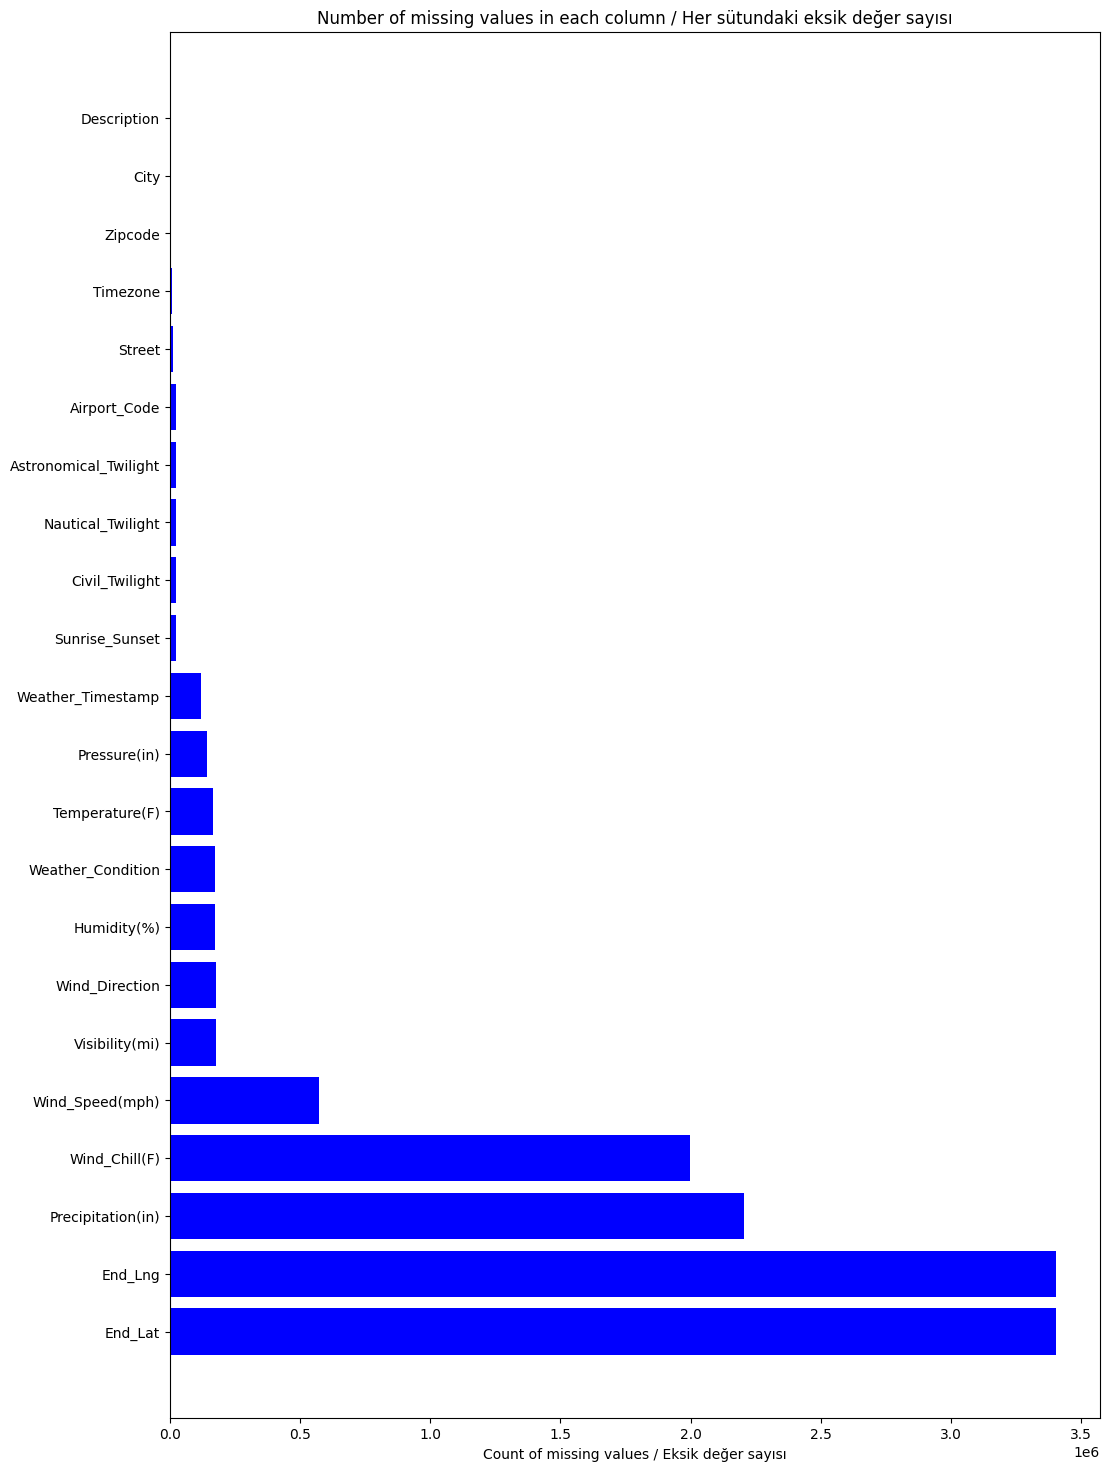

In [36]:
# English: Calculate the number of missing values per column
# Türkçe: Sütun başına eksik değerlerin sayısını hesapla
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']

# English: Filter columns with missing values
# Türkçe: Eksik değer içeren sütunları filtrele
missing_df = missing_df.loc[missing_df['missing_count'] > 0]  # 'ix' yerine 'loc' kullanıldı
missing_df = missing_df.sort_values(by='missing_count', ascending=False)

# English: Visualize missing values
# Türkçe: Eksik verileri görselleştirme
ind = np.arange(missing_df.shape[0])  # Sütun sayısına göre indeks oluştur
width = 0.5
fig, ax = plt.subplots(figsize=(12, 18))
rects = ax.barh(ind, missing_df['missing_count'].values, color='blue')  # Yatay çubuk grafiği
ax.set_yticks(ind)
ax.set_yticklabels(missing_df['column_name'].values, rotation='horizontal')  # Sütun adlarını etikete ekle
ax.set_xlabel("Count of missing values / Eksik değer sayısı")
ax.set_title("Number of missing values in each column / Her sütundaki eksik değer sayısı")
plt.show()


In [37]:
# Step 5: Drop or fill missing values
# Eksik verilerin giderilmesi
# Çok fazla eksik veri içeren sütunları kaldıralım (> 50% eksik veri oranı)
thresh = 0.5 * len(df)
columns_to_drop = missing_values[missing_values > thresh].index

print("\nColumns Dropped Due to Missing Values / Eksik Veriler Nedeniyle Kaldırılan Sütunlar:")
print(columns_to_drop)
df = df.drop(columns=columns_to_drop)


Columns to drop due to high missing values:
Index([], dtype='object')


In [38]:
# Fill remaining missing values with appropriate strategies
# Kalan eksik değerleri uygun yöntemlerle doldurun
# For numerical columns, use mean; for categorical columns, use mode
# Sayısal sütunlar için mean; kategorik sütunlar için mod kullanın
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Numeric columns / Sayısal sütunlar
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'object':  # Categorical columns / Kategorik sütunlar
        df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-38-b2d395fb571d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-38-b2d395fb571d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [39]:
# Confirm no missing values remain
# Eksik veri olup olmadığını kontrol etme
print("\nRemaining Missing Values / Kalan Eksik Veriler:")
print(df.isnull().sum().sum())  # Prints 0 if no missing values remain / Eğer eksik veri kalmadıysa 0 yazdırır.


Remaining Missing Values / Kalan Eksik Veriler:
0


In [40]:
# Step 6: Basic statistics of the dataset
# Veri setinin temel istatistiklerini inceleme
print("\n=== Dataset Statistics ===")
print(df.describe(include='all'))


=== Dataset Statistics ===
             ID   Source      Severity           Start_Time  \
count   7728394  7728394  7.728394e+06              7728394   
unique  7728394        3           NaN              6131796   
top         A-1  Source1           NaN  2021-01-26 16:16:13   
freq          1  4325632           NaN                  225   
mean        NaN      NaN  2.212384e+00                  NaN   
std         NaN      NaN  4.875313e-01                  NaN   
min         NaN      NaN  1.000000e+00                  NaN   
25%         NaN      NaN  2.000000e+00                  NaN   
50%         NaN      NaN  2.000000e+00                  NaN   
75%         NaN      NaN  2.000000e+00                  NaN   
max         NaN      NaN  4.000000e+00                  NaN   

                   End_Time     Start_Lat     Start_Lng       End_Lat  \
count               7728394  7.728394e+06  7.728394e+06  7.728394e+06   
unique              6705355           NaN           NaN           NaN


# ===========================================
# Feature Engineering
# ===========================================

In [41]:
# Özellik mühendisliği
# Tarih ile ilgili bilgileri ayrıştırma
if 'Start_Time' in df.columns:
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    df['Year'] = df['Start_Time'].dt.year
    df['Month'] = df['Start_Time'].dt.month
    df['Day'] = df['Start_Time'].dt.day
    df['Hour'] = df['Start_Time'].dt.hour
    df['Weekday'] = df['Start_Time'].dt.weekday
    print("\nExtracted temporal features from 'Start_Time'.")



Extracted temporal features from 'Start_Time'.


In [42]:
# Yeni bir özellik: Kazanın toplam süre hesabı (dakika cinsinden)
if 'Start_Time' in df.columns and 'End_Time' in df.columns:
    df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
    df['Duration_Minutes'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60.0
    print("\nCalculated 'Duration_Minutes' feature.")


Calculated 'Duration_Minutes' feature.


In [43]:
# Coğrafi bilgilerin kontrolü ve özetlenmesi
if 'Start_Lat' in df.columns and 'Start_Lng' in df.columns:
    print("\nGeographical data overview:")
    print(f"Latitude range: {df['Start_Lat'].min()} to {df['Start_Lat'].max()}")
    print(f"Longitude range: {df['Start_Lng'].min()} to {df['Start_Lng'].max()}")


Geographical data overview:
Latitude range: 24.5548 to 49.002201
Longitude range: -124.623833 to -67.113167


In [44]:
# Yeni özellikler üzerinde temel istatistikler
print("\n=== Updated Dataset Statistics ===")
print(df.describe(include='all'))


=== Updated Dataset Statistics ===
             ID   Source      Severity                     Start_Time  \
count   7728394  7728394  7.728394e+06                        6985228   
unique  7728394        3           NaN                            NaN   
top         A-1  Source1           NaN                            NaN   
freq          1  4325632           NaN                            NaN   
mean        NaN      NaN  2.212384e+00  2020-03-21 21:49:59.056443136   
min         NaN      NaN  1.000000e+00            2016-01-14 20:18:33   
25%         NaN      NaN  2.000000e+00  2018-09-17 02:20:31.750000128   
50%         NaN      NaN  2.000000e+00     2020-06-23 13:37:23.500000   
75%         NaN      NaN  2.000000e+00            2021-10-28 15:44:07   
max         NaN      NaN  4.000000e+00            2023-03-31 23:30:00   
std         NaN      NaN  4.875313e-01                            NaN   

                             End_Time     Start_Lat     Start_Lng  \
count             